<h1>Chapter 4 | Data Exercise #1 | <code>hotels-vienna</code> | Comparison and correlation</h1>
<h2>Introduction:</h2>
<p>In this notebook, you will find my notes and code for Chapter 5's <b>exercise 1</b> of the book <a href="https://gabors-data-analysis.com/">Data Analysis for Business, Economics, and Policy</a>, by Gábor Békés and Gábor Kézdi. The question was: 
<p>1. Are central hotels better? To answer this, using the <code>hotels-vienna</code> dataset (as discussed in Chapter 3, Sesction 3.A1), create <b>two categories</b> by the <b>distance from center</b>: close and far (by picking a cutoff of your choice).</p>
<p>Assignments:</p>
<ul>
    <li>Show summary statistics.</li>
    <li>Compare <b>stars</b> and <b>ratings</b> and <b>prices</b> for close and far hotels.</li>
    <li>Create stacked bar charts, box plots, and violin plots.</li>
    <li>Summarize your findings.</li>
</ul>
<h2><b>1.</b> Load the data</h2>

In [1]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
from mizani.formatters import percent_format

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [3]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_data_exercises")[0]

# Get location folders
data_in = f"{dirname}da_data_repo/hotels-vienna/clean/"
data_out = f"{dirname}da_data_exercises/ch04-comparison_correlation/01-hotels_vienna/data/clean/"
output = f"{dirname}da_data_exercises/ch04-comparison_correlation/01-hotels_vienna/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [4]:
from py_helper_functions import *

In [5]:
df = pd.read_csv(f"{data_in}hotels-vienna.csv")

In [6]:
df.head()

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,...,15-50% offer,2017,11,0,0,2.7,4.4,Apartment,1,4.4
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9


<p>Let's filter our data and restrict the accomodation type to hotels only.</p>

In [7]:
vienna_cut = df.loc[lambda x: x["accommodation_type"] == "Hotel"]

In [8]:
vienna_cut["accommodation_type"].value_counts()

Hotel    264
Name: accommodation_type, dtype: int64

<h2><b>2.</b> Binning quantitative <code>distance</code></h2>
<p>In chapter 3, we had defined that hotels above a 8-mile distance from the center were too far out and therefore marked as such. Given that a great deal of hotels were within a 2-mile distance, we can bin any hotel below this value as <b>close</b> and those farther than this distance as <b>far</b>. Let's do it.</p>

In [9]:
vienna_cut["distance2bins"] = np.where(vienna_cut["distance"] < 2, 1, pd.np.nan)
vienna_cut["distance2bins"] = np.where(vienna_cut["distance"] >= 2, 2, vienna_cut["distance2bins"])


In [10]:
vienna_cut.head()

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating,distance2bins
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,2017,11,0,0,1.7,3.8,Hotel,1,3.9,1.0
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,2017,11,0,0,1.4,2.5,Hotel,1,3.7,1.0
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,2017,11,0,0,1.7,2.5,Hotel,1,4.0,1.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,2017,11,0,0,1.2,2.8,Hotel,1,3.9,1.0
6,Austria,Vienna,57.0,City centre,Donauturm,Alsergrund,103,Vienna,4.0,3.5,...,2017,11,0,0,0.9,2.4,Hotel,1,3.9,1.0


In [11]:
vienna_cut["accommodation_type"].value_counts()

Hotel    264
Name: accommodation_type, dtype: int64

<h2><b>3.</b> Create summary statistics</b></h2>
<p>Let's create one table for each variable and compare the results.</p>

In [12]:
# Summary - stars
vienna_cut.filter(["stars","distance2bins"]).groupby("distance2bins").agg(
    ["min", "max", "mean","median", np.std, "size"]
)

stars                                     
                min  max      mean median       std size
distance2bins                                           
1.0             1.0  5.0  3.669192    4.0  0.777482  198
2.0             2.0  4.5  3.431818    3.0  0.600553   66

<p>In terms of stars, we can say that hotels that are close to the city center get more stars - 3.66 vs 3.43 for hotels that were qualified as far. But that is not the entire story. While hotels above the 2-mile threshold distance get a lower average score, there is <b>less uncertainty</b> regarding the spread of their data. Hotels closer to the center have lower min and higher max values, hence, you can expect to find a 1 to a 5-star hotel within this distance. Hotels farther from the center, meanwhile, have a higher min stars and a slightly lower max stars score - 2 and 4.5, respectively. As such, the standard deviation of hotels closer to center is higher, which reflects a higher degree of uncertainty.</p>
<p>Let's take a look at the ratings for each bin.</p>

In [13]:
# Summary - rating
vienna_cut.filter(["rating","distance2bins"]).groupby("distance2bins").agg(
    ["min", "max", "mean","median", np.std, "size"]
)

rating                                     
                 min  max      mean median       std size
distance2bins                                            
1.0              1.0  4.9  4.109645    4.1  0.441771  198
2.0              2.0  4.5  3.859091    4.0  0.471977   66

<p>Observations:</p>
<ul>
<li>The mean rating value for closer hotels is higher - 4.10 vs. 3.85.</li>
<li>The range of ratings for hotels closer to city center is wider, which means you may get pretty badly rated hotels, as well as really positive ones. If one values user review, hotels farther away tend to concentrate ratings in a shorter range, which means that you may expect not so many extreme values to both ends of the ratings' range.</li>
<li>Overall, the standard deviation for both cases is pretty similar. More distant hotels can expect more spread of the data, as the statistic is a bit higher.</li>
</ul>
<p>At last, let's take a look at the summary statistics for price.</p>

In [14]:
# Summary - price
vienna_cut.filter(["price","distance2bins"]).groupby("distance2bins").agg(
    ["min", "max", "mean","median", np.std, "size"]
)

price                                          
                min   max        mean median         std size
distance2bins                                                
1.0              33  1012  142.419192  111.0  115.539349  198
2.0              50   208   92.469697   83.0   32.245319   66

<p>Now here we can make some interesting observations!</p>
<ul>
<li>There is some significant difference among both categories (let's just call them <code>1</code> and <code>2</code>, which represent, respectivelly, hotels below and above the 2-mile distance from city center).</li>
<li>The mean price for 1 is <b>142</b> dollars, while 2's is <b>92</b> dollars. This is a <b>significant difference</b>, and reflects a higher value being given to hotels closer to city center.</li>
<li>Still, one can get some cheap deals at a closer distance to center. Min price for 1 is <b>33</b> dollars, while for 2, the same statistic is <b>50</b>.</li>
<li>The max price is extremely high for 1 (1012 dollars), while not as much for 2 (208 dollars).</li>
<li>The occurence of such extreme values in 1 may reflect the high variability in the quality of hotels closer to the city center. There may be really cheap hotels that cater to students, for instance, as well as expensive ones that attract tourists with a higher budget. Hotels that are farther away, meanwhile, may seek to establish a more predictable, stable, quality service, as extremely cheap or expensive hotels would probably not attract too many tourists (tourists on a tight budget would consider the expenses with transportation, for instance).</li>
<li>The median is closer than the mean when comparing both bins. This means that the extremely high values found in 1 are affecting the mean price. Bin 2 has a median and a mean value that are closer than 1, which means that the distribution of such values may not be as skewed as 1.</li>
<li>The standar deviation indicates the skewness of 1. While it registered a value of 115 dollars, 2 has a value of only 32. What does that tell us? Well, if you are looking for a good deal, maybe looking for hotels not that close to city center may return results with not as much variability. If the mean is 92 dollars, you can expect to pay between around 122 and 60 dollars for a hotel there.</li>
</ul>
<h2><b>4.</b> Plotting charts</b>
<h3>4.1 Stacked bar charts</h3>
<h4>4.1.1 Hotel stars</h4>

In [15]:
vienna_cut.head()

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating,distance2bins
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,2017,11,0,0,1.7,3.8,Hotel,1,3.9,1.0
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,2017,11,0,0,1.4,2.5,Hotel,1,3.7,1.0
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,2017,11,0,0,1.7,2.5,Hotel,1,4.0,1.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,2017,11,0,0,1.2,2.8,Hotel,1,3.9,1.0
6,Austria,Vienna,57.0,City centre,Donauturm,Alsergrund,103,Vienna,4.0,3.5,...,2017,11,0,0,0.9,2.4,Hotel,1,3.9,1.0


In [16]:
df1 = pd.DataFrame(
    vienna_cut.loc[:, ["distance2bins", "stars"]].groupby(["distance2bins", "stars"]).agg("size")
).reset_index()

df1.columns = ["distance2bins", "stars", "Count"]

group_counts = df1.groupby("distance2bins").agg("sum")["Count"]

df1.loc[df1["distance2bins"] == 1, "Percent"] = round(df1.loc[df1["distance2bins"] == 1, "Count"]/group_counts[1],5)
df1.loc[df1["distance2bins"] == 2, "Percent"] = round(df1.loc[df1["distance2bins"] == 2, "Count"]/group_counts[2],5)

df1 = df1.assign(
    stars=pd.Categorical(
        df1["stars"], categories=sorted(set(df["stars"]), reverse=True)
    )
)

In [17]:
df1

,distance2bins,stars,Count,Percent
0,1.0,1.0,1,0.00505
1,1.0,2.0,11,0.05556
2,1.0,2.5,2,0.01010
3,1.0,3.0,57,0.28788
4,1.0,3.5,10,0.05051
5,1.0,4.0,91,0.45960
6,1.0,4.5,3,0.01515
7,1.0,5.0,23,0.11616
8,2.0,2.0,3,0.04545
9,2.0,3.0,31,0.46970


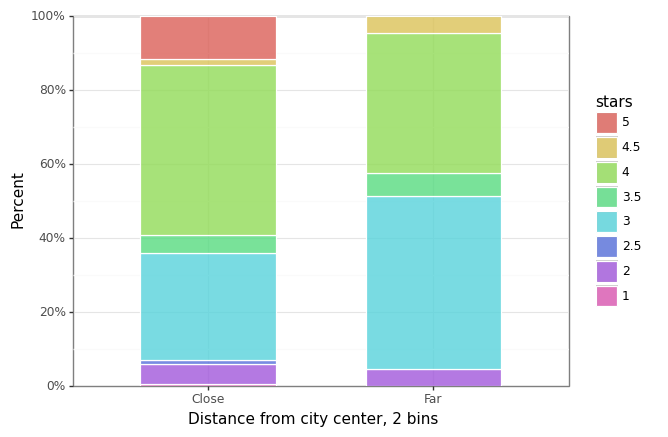

<ggplot: (133389123488)>

In [18]:
ggplot(df1, aes(x="distance2bins", y="Percent", fill="stars")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous(
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Distance from city center, 2 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_x_discrete(limits=[1, 2],
                     labels=["Close", "Far"])

As we can see, hotels closer to city center present a higher count of 4 to 5 star hotels. Indeed, there are no 5-star hotels above a 2-mile distance. We get around 45 percent of 4-star hotels at a closer distance, while we get 46% of 3-star hotels when farther away. When it comes to low-star hotels, "Close" category amasses a higher percentage of 1 to 2-star hotels. There is no 1-star hotel in "Far" category, meanwhile. So here's the main difference regarding hotel stars and distance from the city center: you can expect higher star ratings when closer to the city center, but you can also expect more low budged, lowly graded hotels. Hotels farther away tend to show more consistency at a more centered value, that is, most of the hotels are between 3 to 4 stars, with few observations on both extremes.</p>
<h4>4.1.2 Ratings</h4>

In [19]:
vienna_cut.dropna(subset="rating",inplace=True)

In [20]:
vienna_cut["rating"].isna().value_counts()

False    263
Name: rating, dtype: int64

In [21]:
df2 = pd.DataFrame(
    vienna_cut.loc[:, ["distance2bins", "rating"]].groupby(["distance2bins", "rating"]).agg("size")
).reset_index()

df2.columns = ["distance2bins", "rating", "Count"]

group_counts = df2.groupby("distance2bins").agg("sum")["Count"]

df2.loc[df2["distance2bins"] == 1, "Percent"] = round(df2.loc[df2["distance2bins"] == 1, "Count"]/group_counts[1],5)
df2.loc[df2["distance2bins"] == 2, "Percent"] = round(df2.loc[df2["distance2bins"] == 2, "Count"]/group_counts[2],5)

df2["rating"] = pd.cut(df2["rating"], bins=[1, 2, 3, 4, 5, 6], labels=[1, 2, 3, 4, 5], right=False)
df2 = df2.assign(
    rating=pd.Categorical(
        df2["rating"], categories=sorted(set(vienna_cut["rating"]), reverse=True)
    )
)

In [22]:
df2

,distance2bins,rating,Count,Percent
0,1.0,1.0,1,0.00508
1,1.0,2.0,1,0.00508
2,1.0,3.0,3,0.01523
3,1.0,3.0,4,0.02030
4,1.0,3.0,11,0.05584
5,1.0,3.0,13,0.06599
6,1.0,3.0,21,0.10660
7,1.0,4.0,30,0.15228
8,1.0,4.0,28,0.14213
9,1.0,4.0,21,0.10660


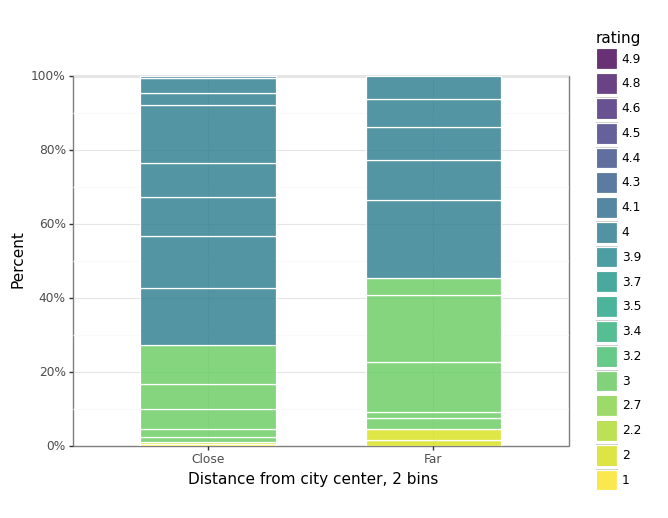

<ggplot: (133292426676)>

In [23]:
ggplot(df2, aes(x="distance2bins", y="Percent", fill="rating")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous(
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Distance from city center, 2 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_x_discrete(limits=[1, 2],
                     labels=["Close", "Far"])

<p>We can notice how hotels binned as "Close" get a higher percentage of very good reviews (i.e. above 4.6, whose values are non-existent for "Far" hotels). Interestingly, hotels binned as "Far" did not get consistent ratings - you can expect to find some lowly-rated hotels as you could do when looking for a hotel closer to the city center. The difference is not that great. To sum it up, user reviews were not as positive and consistent as star ratings for "Far" hotels.</p>

<h4>4.1.3 Price</h4>

In [24]:
df3 = pd.DataFrame(
    vienna_cut.loc[:, ["distance2bins", "price"]].groupby(["distance2bins", "price"]).agg("size")
).reset_index()

df3.columns = ["distance2bins", "price", "Count"]

group_counts = df3.groupby("distance2bins").agg("sum")["Count"]

df3.loc[df3["distance2bins"] == 1, "Percent"] = round(df3.loc[df3["distance2bins"] == 1, "Count"]/group_counts[1],5)
df3.loc[df3["distance2bins"] == 2, "Percent"] = round(df3.loc[df3["distance2bins"] == 2, "Count"]/group_counts[2],5)

# df3["price"] = pd.cut(df3["price"], bins=[1, 2, 3, 4, 5, 6], labels=[1, 2, 3, 4, 5], right=False)
df3 = df3.assign(
    price=pd.Categorical(
        df3["price"], categories=sorted(set(vienna_cut["price"]), reverse=True)
    )
)

In [25]:
df3

,distance2bins,price,Count,Percent
0,1.0,33,2,0.01015
1,1.0,52,1,0.00508
2,1.0,54,1,0.00508
3,1.0,56,1,0.00508
4,1.0,58,1,0.00508
5,1.0,59,1,0.00508
6,1.0,60,1,0.00508
7,1.0,61,1,0.00508
8,1.0,63,1,0.00508
9,1.0,66,2,0.01015


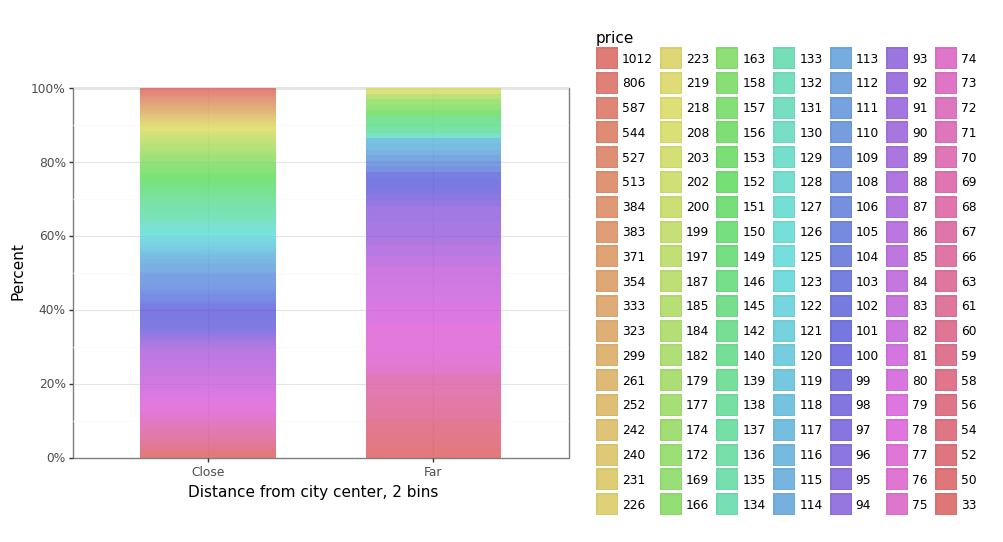

<ggplot: (133294672984)>

In [26]:
ggplot(df3, aes(x="distance2bins", y="Percent", fill="price")) + geom_bar(
    stat="identity", position="fill", width=0.6, size=0.5, alpha=0.8
) + scale_y_continuous(
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Distance from city center, 2 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_x_discrete(limits=[1, 2],
                     labels=["Close", "Far"])

<p>Although an imperfect chart (I will have to review it later), we can see how hotels farther from the center are cheaper - at least, there are more of them. "Close" hotels present more variabilty, meaning you can get a wide range of prices.</p>
<h3>4.2 Box plots</h3>
<h4>4.2.1 Stars<h4>


In [27]:
vienna_cut.head()

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating,distance2bins
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,2017,11,0,0,1.7,3.8,Hotel,1,3.9,1.0
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,2017,11,0,0,1.4,2.5,Hotel,1,3.7,1.0
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,2017,11,0,0,1.7,2.5,Hotel,1,4.0,1.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,2017,11,0,0,1.2,2.8,Hotel,1,3.9,1.0
6,Austria,Vienna,57.0,City centre,Donauturm,Alsergrund,103,Vienna,4.0,3.5,...,2017,11,0,0,0.9,2.4,Hotel,1,3.9,1.0


In [28]:
vienna_cut = vienna_cut.replace({"distance2bins": {
    1: "Close",
    2: "Far",
}})

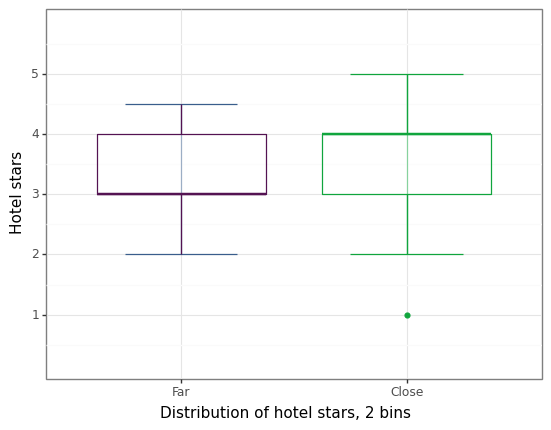

<ggplot: (133294730571)>

In [29]:
# Bot plots
ggplot(vienna_cut, aes(x="pd.Categorical(vienna_cut['distance2bins'], categories=sorted(set(vienna_cut['distance2bins']), reverse=True))",
               y="stars",
               ),
    ) + stat_boxplot(
        aes(group="distance2bins"),
        geom="errorbar",
        width=0.5,
        color=(color[1], color[0]),
        size=0.5,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="distance2bins"),
        color=(color[2], color[1]),
        size=0.5,
        alpha=0.5,
        na_rm=True,
    ) + labs(
        x="Distribution of hotel stars, 2 bins",
        y="Hotel stars"
    ) + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 6), breaks=seq(1, 6, 1)
    ) + theme_bw()

<p>We can confirm some of our previous findings.</p> 
<ul>
<li>First, hotels binned as "Far" tend to show a less dispersed distribution. You don't get to find hotels below 2 stars, but you also don't find any above 4.5 stars.</li>
<li>Second, hotels binned as "Close" present a wider spread. We even get an outlier, a 1-star hotel. But you also get 5-star hotels.</li>
<li>Overall, the distribution is not super different. The median for each bin is different - 3 for "Far", 4 for "Close", which reflects the wider range of star ratings in the latter. But the IQR looks fairly similar, meaning 50% of the hotels tend to present between 3 and 4 stars.</li>
</ul>
<h4>4.2.2 Ratings<h4>

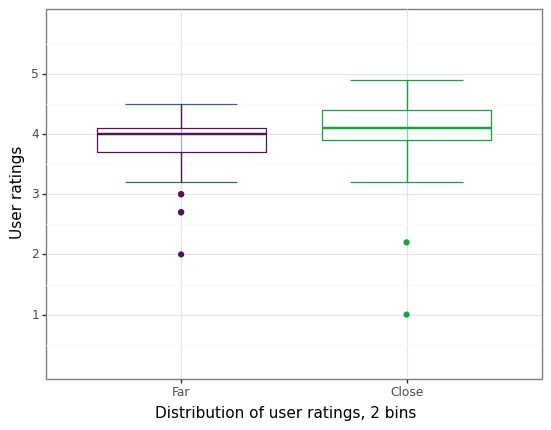

<ggplot: (133294730376)>

In [30]:
# Bot plots
ggplot(vienna_cut, aes(x="pd.Categorical(vienna_cut['distance2bins'], categories=sorted(set(vienna_cut['distance2bins']), reverse=True))",
               y="rating",
               ),
    ) + stat_boxplot(
        aes(group="distance2bins"),
        geom="errorbar",
        width=0.5,
        color=(color[1], color[0]),
        size=0.5,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="distance2bins"),
        color=(color[2], color[1]),
        size=0.5,
        alpha=0.5,
        na_rm=True,
    ) + labs(
        x="Distribution of user ratings, 2 bins",
        y="User ratings"
    ) + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 6), breaks=seq(1, 6, 1)
    ) + theme_bw()

<p>A few observations:</p>
<ul>
<li>There seems to be a positive correlation between distance and ratings. "Close" ratings are higher and more concentrated on higher scores. Ignoring the extreme values, we can observe that the range of this category is overall higher, with the same min and a higher max range value.</li>
<li>The IQR for both categories is different. For "Close" hotels, it is higher, which confirms the fact that overall ratings are higher for hotels close to the city center.</li>
<li>While "Far" hotels are not as positively rated as "Close", they are more concentrated. The spread of the data is lower, which indicates that there is a higher proability of getting hotels within a predictable margin. If one is considering a decent, reasonably priced hotel, this might be a good choice.</li>
</ul>
<h4>4.2.3 Price<h4>

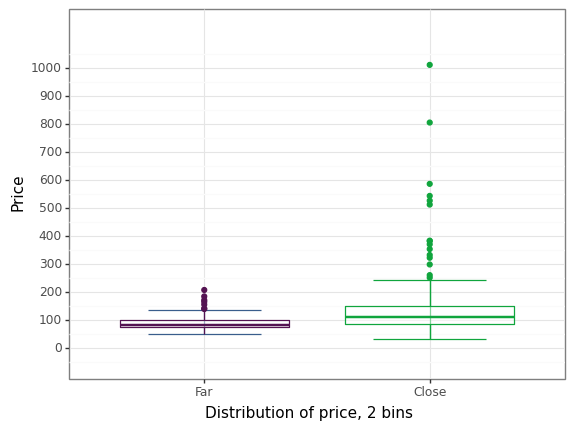

<ggplot: (133295506123)>

In [31]:
# Bot plots
ggplot(vienna_cut, aes(x="pd.Categorical(vienna_cut['distance2bins'], categories=sorted(set(vienna_cut['distance2bins']), reverse=True))",
               y="price",
               ),
    ) + stat_boxplot(
        aes(group="distance2bins"),
        geom="errorbar",
        width=0.5,
        color=(color[1], color[0]),
        size=0.5,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="distance2bins"),
        color=(color[2], color[1]),
        size=0.5,
        alpha=0.5,
        na_rm=True,
    ) + labs(
        x="Distribution of price, 2 bins",
        y="Price"
    ) + scale_y_continuous(
        expand=(0.1, 0.1), limits=(0, 1100), breaks=seq(0, 1100, 100)
    ) + theme_bw()

<p>A few observations:</p>
<ul>
<li>Hotels closer to the city center are more positively correlated with higher prices. </li>
<li>The IQR for both categories is different. For "Close" hotels, it is higher, which confirms the fact that overall ratings are higher for hotels close to the city center.</li>
<li>While "Far" hotels are not as positively rated as "Close", they are more concentrated. The spread of the data is lower, which indicates that there is a higher proability of getting hotels within a predictable margin. If one is considering a decent, reasonably priced hotel, this might be a good choice.</li>
</ul>
<h3>4.3 Violin plots</h3>
<h4>4.3.1 Stars<h4>


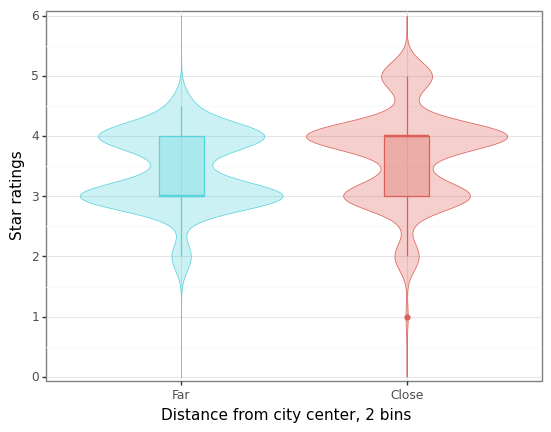

<ggplot: (133297783379)>

In [39]:
ggplot(vienna_cut, 
       aes(x="pd.Categorical(vienna_cut['distance2bins'], categories=sorted(set(vienna_cut['distance2bins']), reverse=True))",
           y="stars",
           color="distance2bins",
           fill="distance2bins",    
               ),
    ) + geom_violin(
        aes(group="distance2bins"),
        alpha=0.3,
        size=0.3,
        trim=False,
        show_legend=False,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="distance2bins"),
        size=0.5,
        alpha=0.3,
        width=0.2,
        na_rm=True,
    ) + labs(
        x="Distance from city center, 2 bins",
        y="Star ratings"
    ) + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 6), breaks=seq(0, 7, 1)
    ) + guides(
        fill=False, color=False
    ) + theme_bw()

<p>Observations:</p>
<ul>
<li>The violin plots show that the median star rating is higher for hotels closer to the city center.</li>
<li>The IQR for both categories is pretty similar, ranging between 3 and for stars.</li>
<li>The spread of the data is quite different though. First, the 95% CI for both ends of each plot tell us that we get to find hotels with a higher star ratings in the "Closer" category; hotels binned as "Far" tend to receive slightly lower stars.</li>
<li>Hotels binned as "Far" tend to be more concentrated in terms of number of stars. Most of the observations were marked as 3 stars. In the case of "Close", we see that most hotels were qualified as 4 stars. The distribution, however, is more spreaded for the latter. There is a considerable density in 5-star observations for hotels closer to the center, yet we can also observe 2 and even 1-star ratings. Hotels binned as "Far" are mainly qualified as either 3 or 4 stars, which confirms our previous findings regarding how you can expect more consistency in this category for these hotels.</li>
</ul>
<h4>4.3.2 Ratings</h4>

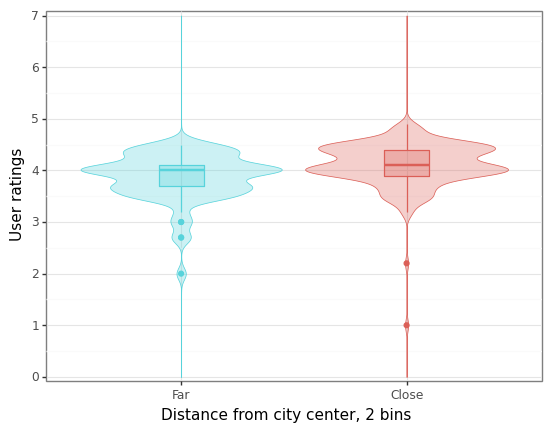

<ggplot: (133297712585)>

In [38]:
ggplot(vienna_cut, 
       aes(x="pd.Categorical(vienna_cut['distance2bins'], categories=sorted(set(vienna_cut['distance2bins']), reverse=True))",
           y="rating",
           color="distance2bins",
           fill="distance2bins",    
               ),
    ) + geom_violin(
        aes(group="distance2bins"),
        alpha=0.3,
        size=0.3,
        trim=False,
        show_legend=False,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="distance2bins"),
        size=0.5,
        alpha=0.3,
        width=0.2,
        na_rm=True,
    ) + labs(
        x="Distance from city center, 2 bins",
        y="User ratings"
    ) + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 7), breaks=seq(0, 8, 1)
    ) + guides(
        fill=False, color=False
    ) + theme_bw()

<p>Observations:</p>
<ul>
<li>The median for "Close" hotels is slightly higher than for "Far" ones. Both, however, are around 4. </li>
<li>This positive association between ratings and distance is confirmed when considereing the distribution of the data. Overall, we can see that the interval range for "Close" is higher than for "Far". Its IQR is also higher, which means that most observations register a higher user rating when compared to "Far".</li>
<li>We get to see that "Close" presents two higher density points, around 4 and 4.5, respectively. For "Far", most observations are centered around 4, yet we get to see a significant number of observations around 3.5 and at lower values.</li>
<li>The spread of the data, for both cases, also differs. We get to see a higher concentration of data within a smaller range for "Far". For "Close", this range goes up a little bit, starting from a higher lowest point and going up to almost a 4.9 rating for a 95% CI. In other words, not considering the extreme values, you can expect that hotels closer to the city center are also better rated.</li>
</ul>
<h4>4.3.3 Price</h4>

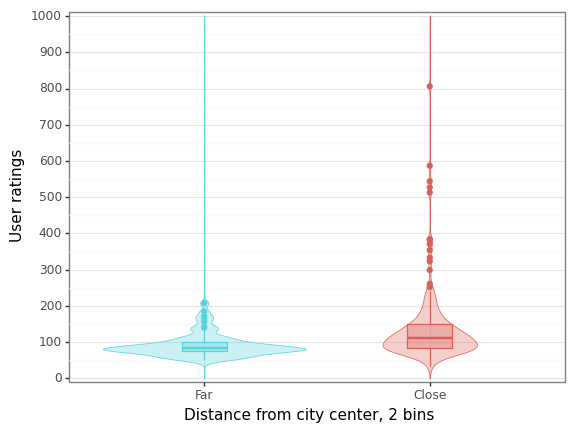

<ggplot: (133297914772)>

In [44]:
ggplot(vienna_cut, 
       aes(x="pd.Categorical(vienna_cut['distance2bins'], categories=sorted(set(vienna_cut['distance2bins']), reverse=True))",
           y="price",
           color="distance2bins",
           fill="distance2bins",    
               ),
    ) + geom_violin(
        aes(group="distance2bins"),
        alpha=0.3,
        size=0.3,
        trim=False,
        show_legend=False,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="distance2bins"),
        size=0.5,
        alpha=0.3,
        width=0.2,
        na_rm=True,
    ) + labs(
        x="Distance from city center, 2 bins",
        y="User ratings"
    ) + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 1000), breaks=seq(0, 1100, 100)
    ) + guides(
        fill=False, color=False
    ) + theme_bw()

<p>This is a very interesting chart!</p>
<ul>
<li>Initially, we can confirm how the median price for "Close" is significantly higher, around 120usd, while for "Far", it is around 80usd.</li>
<li>There is a significant number of extreme values for "Close", which reflect the ocurrence of high standard hotels, way above normal rates. That is not the case at all for "Far", as its most expensive rates fall within normally expected values for "Close".</li>
<li>The negative correlation between distance and price indeeds confirms: you can get well-rated hotels (in stars and user ratings), but you'll expect to pay more.</li>
<li>It is remarkable how similar the prices are for hotels farther from the city center. For instance, there is a enormous concentration of rooms around 80usd - the majority of all are in centered around this price. This is not the case for "Close" hotels. Although there is a higher density of rooms priced around 100-120 usd, there are either a significant number of cheaper or much more expensive hotel rooms. Considering this scenario, hence, you could get a 4 star, 4.1 user rating, hotel room not below the 2-mile threshold for at least 40usd less than a similar room in the city center.</li>
</ul>
<h2>5. Summary of findings</h2>
<p>Is the distance from the city center correlated to important features of a hotel deal? The answer is <b>yes, but it depends</b>. Let's discuss the results for each feature.</p>
<p><b>Stars</b>. At a first glance, the summary statistics for stars and hotels closer a far away from the city center showed that hotels at a closer distance displayed a <b>higher mean value</b> but also a higher <b>dispersion</b>, meaning that there was a wide range of star ratings. When plotting the stacked bar chart, we could see that most hotels at this binned category displayed 4 stars. For hotels located above the defined 2-mile distance, most hotels were rated as 3 stars. After plotting the box and the violin plots, we could make other observations about the distribution of the dataset considering both categories. For "Close" hotels, the median was higher and the 1-star observation was related to a single hotel. Considering the size of the sample - 168 hotels - we could say that indeed <b>hotels closer to the city center were negatively correlated with better star ratings</b>. The violin plot reassures this affirmation, as there was a higher concentration of observations for 4-star hotels and above. For hotels binned as "Far", the 3-star rating was dominant. In conclusion, we can say that, in Rome, you're likely to get hotels with more stars at a closer distance to the city center.</p>
<p><b>Ratings</b>. Similarly to stars, hotels binned as "Close" presented a higher mean value, among a wider range of ratings at both ends. Differently from the previous analyzed feature, however, there was more incertainty with hotels binned as "Far", as their standard deviation was slightly higher than the other category. The stacked bar chart for this feature helped to visualize that, indeed, most hotels closer to the city center presented higher ratings. The boxplot reinforces this observation, as hotels closer to the city center presented an overall higher IQR. Apart from 2 extreme values highlighted in this visualization, the distribution of hotel ratings for this category was higher than hotels located farther away. The violin plot also supports this assumption - we could see how most ratings were above 4 points, while hotels binned as "Far" presented a more dispersed distribution. We can also affirm, hence, that <b>hotels located below the 2-mile distance are negatively related with a higher user rating review.</b></p>
<p><b>Price</b>. Here, our findings lead to interesting results. The summary statistics showed that the mean price for hotels binned as "Close" was significantly higher than those binned as "Far": 142usd vs. 92 usd. The spread of the data was also significantly higher, with very cheap findings and very expensive ones, which lead to a higher dispersion and hence much higher standard deviation. The bar chart showed that "Close" hotels presented more variety for hotel prices. There was no dominant value, as you could find extremely cheap or expensive hotels, as well as prices within a reasonable price. Hotels binned as "Far", meanwhile, showed a higher concentration of prices, with a narrower price range between the min and the max values. When visualizing the boxplot, we could see that the former presented many values considered as extreme. However, even if excluding them, we could see that overall, hotels closer to the city center were more expensive than their counterparts located at a higher distance. Most of the observations - considering the IQR of "Close" - are above what was observed for "Far". This category, meanwhile, showed a great price concentration. After visualizing the violin plot, we could confirm this observation, inasmuch most hotels binned as "Far" registered prices at around 90usd. "Close" hotels, as expected, displayed a wider dispersion of prices. To conclude, once more, the variable price is <b>negatively related with the distance from the city center</b> - excluding some really low and absurdly high prices, you can expect to pay more if you want a place closer to the city center.</p>
<hr>
<h2>6. Conclusion</h2>
<p>Finding a good hotel deal may depend on other variables such as distance. But we affirm that distance is not a negligible fact when deciding where to stay on your next vacations - at least in Rome!</p>
<p>Thank you for reading!</p>